In [1]:
# For Google Colab Use
COLAB = False
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Coding/Projects/MarketMakingAgents/market-making-agents'
    #!git reset --hard origin/master
    #!git pull
    #!git checkout .

In [2]:
from Source.Agents.DeepQNetwork import DQNMarketMaker
from Source.Agents.Utils.DataPlotter import DataPlotter

import gym
import matplotlib.pyplot as plt
import numpy as np

In [3]:
NUMBER_EPISODES = 1000

env = gym.make("CartPole-v0")

numberActions = env.action_space.n
stateSpaceSize = env.observation_space.shape[0]
actionSpace = list(range(numberActions))

dqn = DQNMarketMaker(actionSpace, stateSpaceSize)


DQN using cpu


In [4]:
dataPlotter = DataPlotter()

prevMax = 0.0

for episodeNumber in range(NUMBER_EPISODES):
    state = env.reset()
    episodeReturn = 0.0
    episodeCounter = 0
    done = False

    while not done:
        episodeCounter += 1

        action, actionIndex = dqn.getSkewAction(state)
        nextState, reward, done, _ = env.step(action)
        episodeReturn += reward
        dqn.inputPostTrade(state, actionIndex, reward, done, nextState)
        state = nextState

    dataPlotter.add("episodeReturn", episodeReturn)
    newMean = np.mean(dataPlotter.get("episodeReturn")[-10:])

    if newMean > prevMax:
        prevMax = newMean
        print("New Max Found. Episode: {} EpisodeReturn: {} runningMean: {} Epsilon: {}".format(episodeNumber, episodeReturn, newMean, dqn.getEpsilon()))   
    
    if newMean > 199:
        print("Environment Solved!")
        break




New Max Found. Episode: 0 EpisodeReturn: 12.0 runningMean: 12.0 Epsilon: 0.5
New Max Found. Episode: 16 EpisodeReturn: 15.0 runningMean: 12.4 Epsilon: 0.4647834387891403
New Max Found. Episode: 24 EpisodeReturn: 11.0 runningMean: 12.5 Epsilon: 0.42433619072944545
New Max Found. Episode: 27 EpisodeReturn: 18.0 runningMean: 12.8 Epsilon: 0.4052495411575133
New Max Found. Episode: 28 EpisodeReturn: 11.0 runningMean: 12.9 Epsilon: 0.40081401819691537
New Max Found. Episode: 29 EpisodeReturn: 11.0 runningMean: 13.0 Epsilon: 0.3964270427655208
New Max Found. Episode: 36 EpisodeReturn: 12.0 runningMean: 13.1 Epsilon: 0.361928432018801
New Max Found. Episode: 37 EpisodeReturn: 19.0 runningMean: 13.2 Epsilon: 0.35511333226230424
New Max Found. Episode: 39 EpisodeReturn: 19.0 runningMean: 13.9 Epsilon: 0.3449579324477733
New Max Found. Episode: 40 EpisodeReturn: 34.0 runningMean: 16.3 Epsilon: 0.3334208358186289
New Max Found. Episode: 41 EpisodeReturn: 32.0 runningMean: 18.1 Epsilon: 0.32291510

KeyboardInterrupt: 

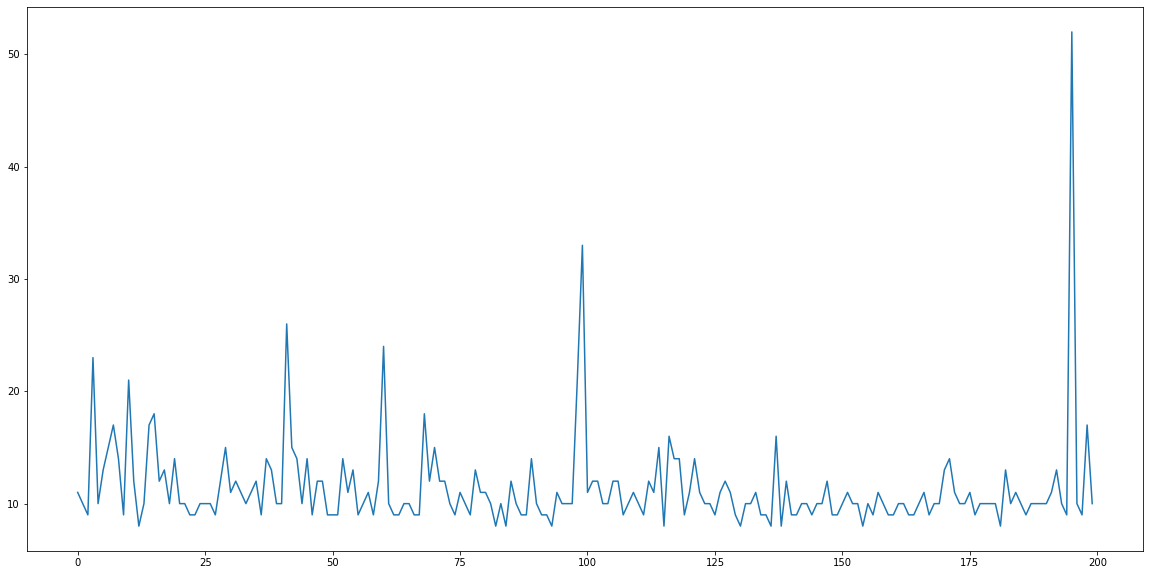

In [5]:
dataPlotter.plot("episodeReturn")